# Using as Module 

This module implements some image filters to achieve the ground glass segmentation. We can use these filters to segment other kinds of images. 
In this example, we will see how to use the functions in CTLungSeg to achieve this purpose.
We will use the images from the COVID-19... dataset, aiming the body segmentation. Notice that we will not use the neural network. 

This example is structured as follows: 

    - Data Loading: howto download the required data
    - Image Pre-processing: noise reduction and contrast enhancment
    - Image Segmentation

In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

## Data Loading

Firstly, we have to download the CT scan from the public dataset. From this dataset, we will use the *coronacases_001* patient as example patient.

The functions *read_image* and *write_volume* from CTLungSeg.utils allow us to read and write images from and to medical image formats such as DICOM and nifti.

In [2]:
import zipfile
import urllib.request
from CTLungSeg.utils import read_image, write_volume

image_url = 'https://zenodo.org/record/3757476/files/COVID-19-CT-Seg_20cases.zip?download=1'


# Download the zip files containing the scans
urllib.request.urlretrieve(image_url, './Example_Scan.zip')

# unzip the files

with zipfile.ZipFile('./Example_Scan.zip', 'r') as zip_ref:
    zip_ref.extractall('./Example_Scan')


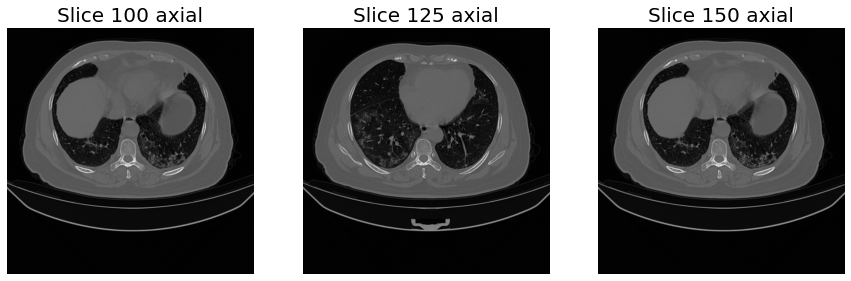

In [3]:
# read the image

image = read_image(filename='./Example_Scan/coronacases_001.nii.gz')

# and show some slices

array = sitk.GetArrayFromImage(image)
array = np.flip(array, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

_ = ax[0].axis('off')
_ = ax[1].axis('off')
_ = ax[2].axis('off')

_ = ax[0].imshow(array[100], cmap='gray')
_ = ax[0].set_title('Slice 100 axial', fontsize=20)

_ = ax[1].imshow(array[125], cmap='gray')
_ = ax[1].set_title('Slice 125 axial', fontsize=20)

_ = ax[2].imshow(array[100], cmap='gray')
_ = ax[2].set_title('Slice 150 axial', fontsize=20)

## Image Pre-Processing

To enhance the image contrast and remove noise, we can apply many image filters. In this example, we will apply adaptive histogram equalization for contrast enhancement;  and  Gaussian smoothing to reduce the image noise. Both these filters are implemented in the *method* module.

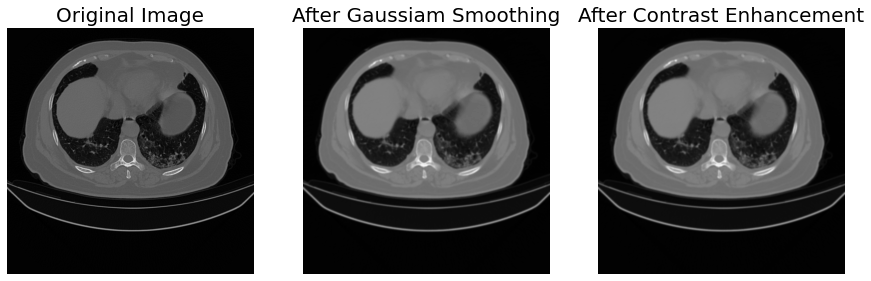

In [4]:
from CTLungSeg.method import gauss_smooth
from CTLungSeg.method import adaptive_histogram_equalization

sigma = 1. # std deviation for the gaussian smoothing
radius = 1 # neighbourhood radius for the adaptive histogram equalization


smooth = gauss_smooth(image=image, sigma=sigma)
enhanced = adaptive_histogram_equalization(image=smooth, radius=radius)

# show the results
s_array = sitk.GetArrayFromImage(smooth)
s_array = np.flip(s_array, axis=1)
e_array = sitk.GetArrayFromImage(enhanced)
e_array = np.flip(e_array, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

_ = ax[0].axis('off')
_ = ax[1].axis('off')
_ = ax[2].axis('off')

_ = ax[0].imshow(array[100], cmap='gray')
_ = ax[0].set_title('Original Image', fontsize=20)

_ = ax[1].imshow(s_array[100], cmap='gray')
_ = ax[1].set_title('After Gaussiam Smoothing', fontsize=20)

_ = ax[2].imshow(e_array[100], cmap='gray')
_ = ax[2].set_title('After Contrast Enhancement', fontsize=20)

## Body Segmentation

Now we will segment the body region applying a simple thresholding. We will use the *threshold* filter in the *method* module.
After that, we will apply this mask to the original image.

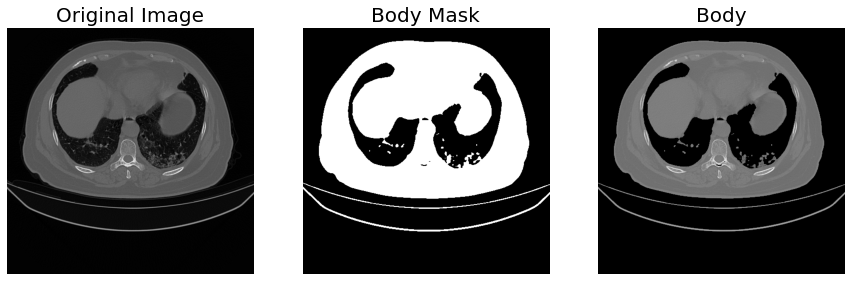

In [5]:
from CTLungSeg.method import threshold
from CTLungSeg.method import apply_mask

upper_thr=1000
lower_thr=-400

body_mask = threshold(image=enhanced, upper=upper_thr, lower=lower_thr)
body = apply_mask(image=image, mask=body_mask)


m_array = sitk.GetArrayFromImage(body_mask)
m_array = np.flip(m_array, axis=1)
b_array = sitk.GetArrayFromImage(body)
b_array = np.flip(b_array, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

_ = ax[0].axis('off')
_ = ax[1].axis('off')
_ = ax[2].axis('off')

_ = ax[0].imshow(array[100], cmap='gray')
_ = ax[0].set_title('Original Image', fontsize=20)

_ = ax[1].imshow(m_array[100], cmap='gray')
_ = ax[1].set_title('Body Mask', fontsize=20)

_ = ax[2].imshow(b_array[100], cmap='gray')
_ = ax[2].set_title('Body', fontsize=20)